In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import the test and train data
df= pd.read_csv("kc_house_data_USA.csv")

In [19]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [32]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

In [23]:
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17592,9268200641,2014-08-20,350000.0,2,1.00,800,5040,1.0,0,0,...,6,800,0,1960,0,98117,47.6953,-122.362,1020,5040
16976,3797710020,2015-03-27,325000.0,4,2.25,1770,7799,2.0,0,0,...,7,1770,0,1998,0,98031,47.4192,-122.202,1770,7778
12513,9144100158,2014-12-29,445000.0,3,1.00,1260,8910,1.0,0,0,...,7,1260,0,1949,0,98117,47.7000,-122.375,1560,8910
5704,1446800660,2015-03-16,276500.0,4,1.75,1400,6650,1.5,0,0,...,6,1400,0,1942,0,98168,47.4888,-122.332,1120,8645
21092,7697000020,2014-10-07,295000.0,3,2.50,1660,4898,2.0,0,0,...,7,1660,0,2011,0,98038,47.3588,-122.044,1810,4462
6890,3831000010,2014-08-06,235000.0,4,1.50,1760,6150,1.5,0,0,...,7,1760,0,1951,0,98031,47.3871,-122.224,1760,8276
11673,46100350,2014-06-30,1730000.0,5,3.50,5000,26540,2.0,0,3,...,10,3410,1590,2008,0,98040,47.5665,-122.210,3360,17398
8409,7855800910,2015-03-21,871000.0,4,2.50,2150,8536,1.0,0,3,...,8,1400,750,1967,0,98006,47.5663,-122.163,2800,9500
18407,3025049052,2014-08-12,822500.0,2,1.00,1450,7098,1.0,0,4,...,7,1450,0,1924,0,98109,47.6300,-122.349,2390,6098
15677,3956900480,2014-09-03,779000.0,3,1.75,1990,5600,1.0,0,1,...,8,1330,660,1941,0,98199,47.6500,-122.415,2630,6780


In [27]:
total_null = df.isnull().sum()
total_null


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null category
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: category(1), float64(5), int64(14), object(1)
memory usage: 3.3+ MB


What a nice data :P
<p>Everything is a numerical fearture.. but do we need them all?</p>


In [4]:
df.view = df.view.astype('category')

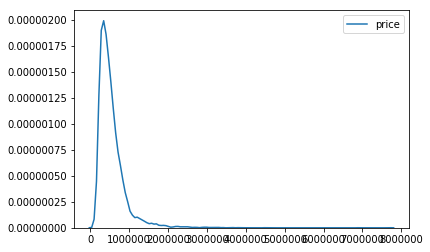

In [2]:
g= sns.kdeplot(df.price)

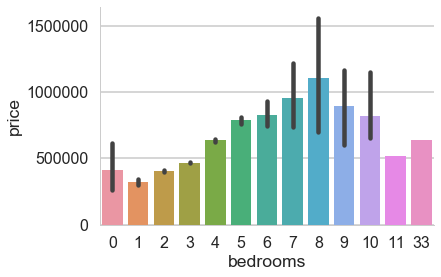

In [20]:
sns.set_style("whitegrid")
sns.set_context(font_scale=0.5,rc= {"lines.linewidth":2.5,'grid.color': '.9'})
viz_one = sns.barplot(x='bedrooms', y='price', data = df)
sns.despine()

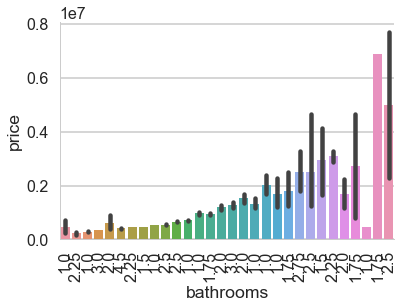

In [51]:
sns.set_style("whitegrid")
sns.set_context(font_scale=0.5,rc= {"lines.linewidth":2.5,'grid.color': '.9'})
viz_three = sns.barplot(x='bathrooms', y='price', data = df)
viz_three.set_xticklabels(df.bathrooms.astype(str),rotation=90)
sns.despine()
plt.show()

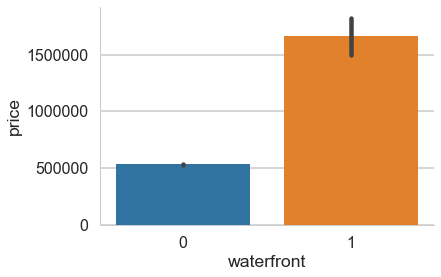

In [45]:
viz_two = sns.barplot(x='waterfront', y='price', data= df)
sns.despine()

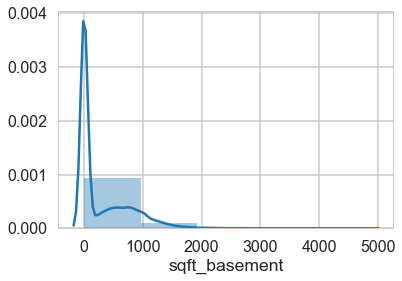

In [26]:
sns.distplot(df['sqft_basement'],bins = 5,hist=True)

<function matplotlib.pyplot.show>

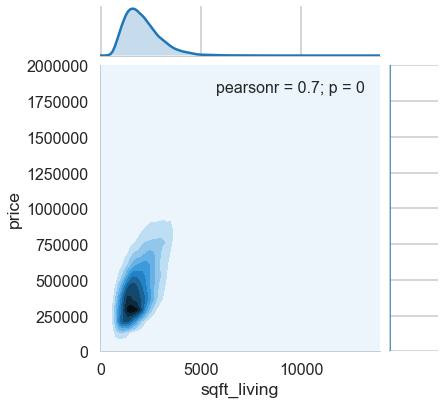

In [54]:
sns.jointplot(x=df['sqft_living'],y=df['price'],kind='kde',size = 6)
plt.xlim(0,5000)
plt.ylim(0,2000000)
plt.show

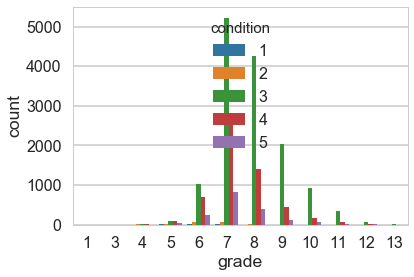

In [38]:
sns.countplot(x='grade', hue = 'condition',data = df)

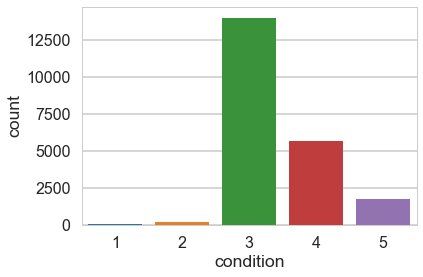

In [40]:
sns.countplot(x=df.condition)

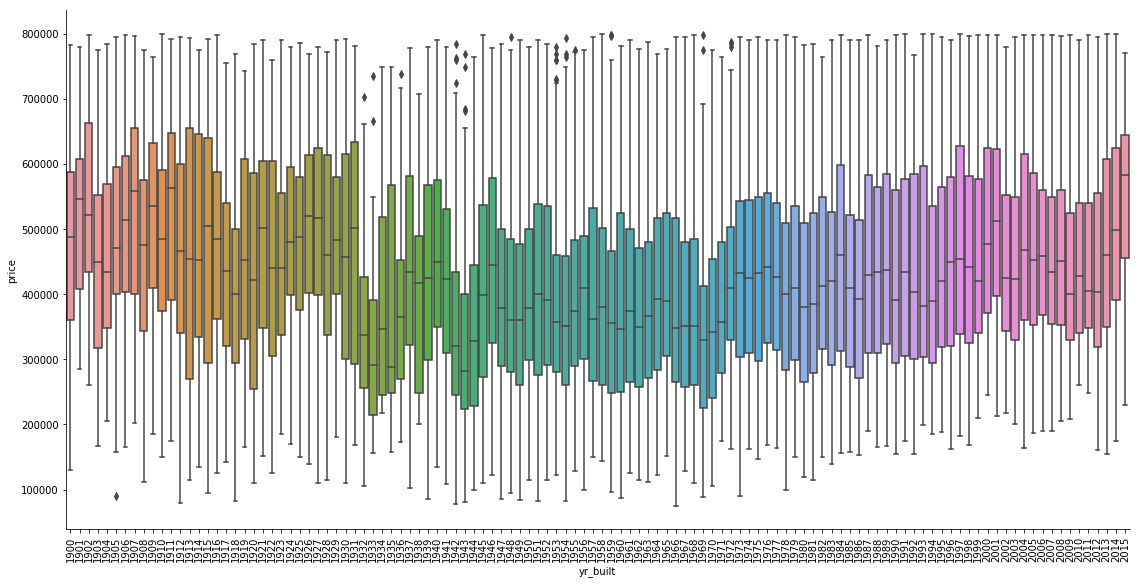

In [3]:
g = sns.factorplot(x="yr_built", y = "price", data=df[df['price'] < 800000], 
                   size= 8, aspect = 2, kind="box" )
g.set_xticklabels(rotation=90)
plt.show()

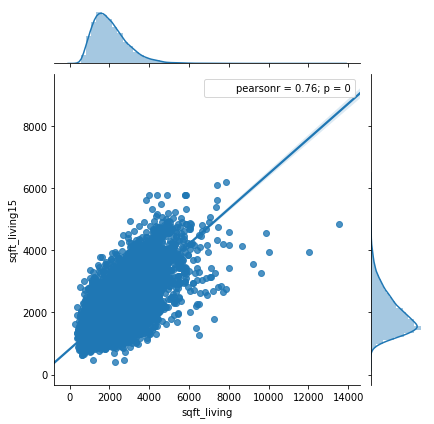

In [2]:
g_sqft_liv = sns.jointplot(df.sqft_living,df.sqft_living15,kind='reg')

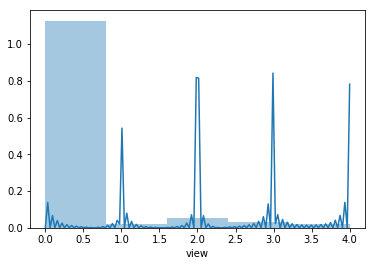

In [6]:
g = sns.distplot(df.view, bins=5)